#  Manually-constructed neural network for regression

In the notebook of tutorial 1 (Notebook 1), we explored simple linear regression based on Portugese white wine data set. Here, we continue with the analysis of the same data set. However, we now manually implement a simple network for solving the regression problem.

## Getting the data

In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# set the path to the data
csv_path = r"C:\Users\Kepesidis\Desktop\Deep Learning for Physicists\tutorials\Tutorial 1\winequality-white.csv"
data = pd.read_csv(csv_path, delimiter=";")

In [16]:
data.shape

(4898, 12)

In [12]:
# Split the data into train and test sets

data_np = data.values # transform to numpy array

np.random.shuffle(data_np) # randomly shaffle data

# use first 3000 examples for training
X_train = data_np[:3000,:11] # predictors
y_train = data_np[:3000,11]  # target variable

# and remaining examples for testing
X_test = data_np[3000:,:11] # predictors
y_test = data_np[3000:,11] # target variable

The main objective here is to train a neural network with one input layer, one hidden layer, and one output layer using gradient descent. First define the matrices and initialise with random values. We need W, b, W' and b'. The shapes will be:

- W: (number of hidden nodes, number of inputs) named **W**
- b: (number of hidden nodes) named **b**
- W': (number of hidden nodes) named **Wp**
- b': (one) named bp

In [13]:
# Initialise weights with suitable random distributions

hidden_nodes = 50 # number of nodes in the hidden layer
n_inputs = 11 # input features in the dataset


W = np.random.randn(hidden_nodes,11)*np.sqrt(2./n_inputs)
b = np.random.randn(hidden_nodes)*np.sqrt(2./n_inputs)
Wp = np.random.randn(hidden_nodes)*np.sqrt(2./hidden_nodes)
bp = np.random.randn((1))

print(W.shape)

(50, 11)


In [14]:
b.shape

(50,)

## Tasks

1. Implement a forward pass of the network within the function **dnn()**. We want a network with one hidden layer. As activiation in the hidden layer $\sigma$ we apply element-wise ReLu, while no activation is used for the output layer. The forward pass of the network then reads: 
$\hat{y}=\mathbf{W}^{\prime} \sigma(\mathbf{W} \vec{x}+\vec{b})+b^{\prime}$

In [17]:
# You can use this implementation of the ReLu activation function
def relu(x):
    return np.maximum(x, 0)

In [18]:
def dnn(x,W,b,Wp,bp):

    return np.dot(Wp, relu(np.dot(W,x) + b)) + bp

2. Implement a function that uses one data point to update the weights using gradient descent. For the regression problem the objective function is the mean squared error between the prediction and the true label $y$: $ L=(\hat{y}-y)^{2}$. Taking the partial derivatives - and diligently applying the chain rule - with respect to the different objects yields:
$$
\begin{aligned}
\frac{\partial L}{\partial b^{\prime}} &=2(\hat{y}-y) \\
\frac{\partial L}{\partial b_{k}} &=2(\hat{y}-y) \mathbf{W}_{k}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k}^{\prime}} &=2(\hat{y}-y) \sigma\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{k}\right) \\
\frac{\partial L}{\partial \mathbf{W}_{k m}} &=2(\hat{y}-y) \mathbf{W}_{m}^{\prime} \theta\left(\sum_{i} \mathbf{W}_{i k} x_{i}+b_{m}\right) x_{k}
\end{aligned}
$$
Here, $\Theta$ denotes the Heaviside step function. Your task is to follow and complete the **update_weights()** function below

In [19]:
def update_weights(x,y, W, b, Wp, bp):
    
    lr = 0.00005

    # SOLUTION

    # Calculate the network output
    phi = dnn(x,W,b,Wp,bp)

    # Use the formulas derived to calculate the gradient for each of W,b,Wp,bp
    delta_bp = 2 * (phi - y)
    delta_Wp = 2 * (phi - y) * relu(np.dot(W,x) + b)
    delta_b  = 2 * (phi - y) * Wp * np.heaviside(np.dot(W,x) + b, 0.5)
    delta_W  = 2 * (phi - y) * np.outer(Wp * np.heaviside(np.dot(W,x) + b, 0.5), x)
                
    # Update the weights/bias following the rule:  X_new = X_old - learning_rate * gradient    
    bp -= lr * delta_bp
    Wp -= lr * delta_Wp
    b  -= lr * delta_b
    W  -= lr * delta_W
    
    return -1 # no return value needed, you can modify the weights in-place

## Training loop and evaluation below

Epoch: 0 Train Loss: 2.1657583692550992 Test Loss: 2.336574297570434
Epoch: 1 Train Loss: 0.8473933999985357 Test Loss: 0.9954634543949445
Epoch: 2 Train Loss: 0.7033832298129076 Test Loss: 0.7729930634059105
Epoch: 3 Train Loss: 0.6757907183681471 Test Loss: 0.735808179931544
Epoch: 4 Train Loss: 0.6659944901238635 Test Loss: 0.7160145792131007
Epoch: 5 Train Loss: 0.6558160288498905 Test Loss: 0.7122621663178694
Epoch: 6 Train Loss: 0.6504766014995229 Test Loss: 0.7046082469539193
Epoch: 7 Train Loss: 0.6460651138626461 Test Loss: 0.6975099921512085
Epoch: 8 Train Loss: 0.6427504987550661 Test Loss: 0.6867880469144063
Epoch: 9 Train Loss: 0.6389965683324892 Test Loss: 0.6832777349961735
Epoch: 10 Train Loss: 0.6361713549288501 Test Loss: 0.6742720363840672
Epoch: 11 Train Loss: 0.6325031633774052 Test Loss: 0.672211433733176
Epoch: 12 Train Loss: 0.6287869069900565 Test Loss: 0.665112588495503
Epoch: 13 Train Loss: 0.6254195708545602 Test Loss: 0.6636757470846254
Epoch: 14 Train Loss

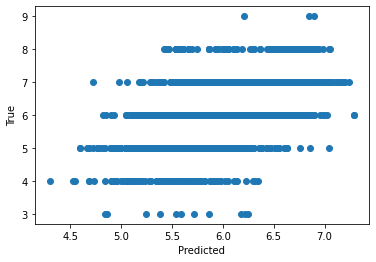

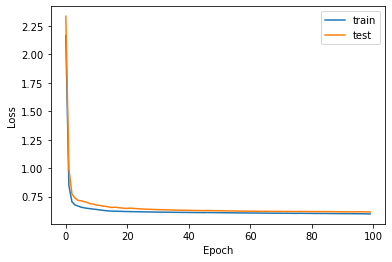

In [20]:
# The code below implements the training.
# If you correctly implement  dnn and update_weights above, 
# you should not need to change anything below. 
# (apart from increasing the number of epochs)

train_losses = []
test_losses = []

# How many epochs to train
n_epochs = 100

# Loop over the epochs
for ep in range(n_epochs):
        
    # Each epoch is a complete over the training data
    for i in range(X_train.shape[0]):
        
        # pick one example
        x = X_train[i]
        y = y_train[i]

        # use it to update the weights
        update_weights(x,y,W,b,Wp,bp)
    
    # Calculate predictions for the full training and testing sample
    y_pred_train = [dnn(x,W,b,Wp,bp)[0] for x in X_train]
    y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

    # Calculate aver loss / example over the epoch
    train_loss = sum((y_pred_train-y_train)**2) / y_train.shape[0]
    test_loss = sum((y_pred-y_test)**2) / y_test.shape[0] 
    
    # print some information
    print("Epoch:",ep, "Train Loss:", train_loss, "Test Loss:", test_loss)
    
    # and store the losses for later use
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
    
# After the training:
    
# Prepare scatter plot
y_pred = [dnn(x,W,b,Wp,bp)[0] for x in X_test]

print("Best loss:", min(test_losses), "Final loss:", test_losses[-1])

print("Correlation coefficient:", np.corrcoef(y_pred,y_test)[0,1])
plt.scatter(y_pred_train,y_train)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Prepare and loss over time
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()